<h2 style="width: 100%; text-align: left;">
    <span style="float: left;">Exercise Number 12</span>
    <span style="float: right;">Date: 26-03-2025</span>
</h2>
<div style="clear: both;"></div>

<h1 style="text-align:center;">Multi Layer Perceptron</h1> 

### <ins>**Aim**</ins>: 
To perform Multi Layer Perceptron on Linearly and Non-Linearly Separable Data

### <ins><b>Algorithm</b></ins>  
#### <ins>Model Overview</ins>

<ins>Multi-Layer Perceptron (MLP) Overview</ins>  
<p>The <b>Multi-Layer Perceptron (MLP)</b> is a class of feedforward artificial neural networks used for both binary and multi-class classification.  
It consists of an input layer, one or more hidden layers, and an output layer. Each layer is composed of neurons with non-linear activation functions that allow the network to model complex, non-linear relationships in data.  
The MLP is trained using backpropagation and gradient descent to minimize the prediction error by adjusting weights and biases across all layers.</p>

#### <ins>Steps Involved</ins>  
<ol>
    <li><b>Data Loading:</b>
        <p>Two synthetic datasets are generated – one that is linearly separable and another that is non-linearly separable.</p>
    </li>
    <li><b>Data Exploration:</b>
        <p>The datasets are visualized using scatter plots to understand their underlying structure and complexity.</p>
    </li>
    <li><b>Data Preprocessing:</b>
        <ul>
            <li><b>Feature Scaling:</b> Standardization is applied to ensure that each input feature contributes equally to learning, improving convergence speed.</li>
        </ul>
    </li>
    <li><b>Model Training:</b>
        <p>An MLP model is implemented from scratch with at least one hidden layer. It is trained on both datasets using stochastic gradient descent (SGD) with backpropagation.</p>
        <p>The weight and bias updates follow the backpropagation algorithm, which includes:</p>
        <ul>
            <li>Forward pass to compute predictions</li>
            <li>Loss computation (e.g., mean squared error or cross-entropy)</li>
            <li>Backward pass to compute gradients</li>
            <li>Parameter updates using the rule:</li>
        </ul>
        <p><b>W_new = W_old - learning_rate * ∂Loss/∂W</b></p>
    </li>
    <li><b>Model Evaluation:</b>
        <p>The trained MLP is evaluated using accuracy and loss metrics on the test set. Decision boundaries are visualized to demonstrate the network's ability to separate classes, even in non-linear settings.</p>
    </li>
</ol>

### <ins>**Code and Output**</ins>

#### <ins>**Linearly Separable Data**</ins>

#### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Load the dataset

In [2]:
X_linear, y_linear = make_classification(n_samples=500, n_features=2, n_informative=2, 
                                         n_redundant=0, n_clusters_per_class=1, random_state=1)

#### Preprocess the data

In [3]:
scaler = StandardScaler()
X_linear = scaler.fit_transform(X_linear)

#### Split the Data

In [4]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

#### Multi Layer Perceptron

In [5]:
class MultiLayerPerceptron:
    def __init__(self, input_dim, hidden_dim, output_dim=1, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.W1 = np.random.randn(input_dim, hidden_dim) * 0.1
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim) * 0.1
        self.b2 = np.zeros((1, output_dim))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, a):
        return a * (1 - a)

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y, output):
        m = X.shape[0]
        dZ2 = output - y.reshape(-1, 1)
        dW2 = (1 / m) * np.dot(self.A1.T, dZ2)
        db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.sigmoid_derivative(self.A1)
        dW1 = (1 / m) * np.dot(X.T, dZ1)
        db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def train(self, X, y):
        for _ in range(self.epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        probs = self.forward(X)
        return (probs >= 0.5).astype(int).flatten()

#### Training the model

In [6]:
mlp_linear = MultiLayerPerceptron(input_dim=2, hidden_dim=5)
mlp_linear.train(X_train_lin, y_train_lin)

#### Evaluating the model

In [7]:
y_pred_lin = mlp_linear.predict(X_test_lin)
print("Accuracy (Linear Data):", accuracy_score(y_test_lin, y_pred_lin))

Accuracy (Linear Data): 0.96


#### Visualisation

In [8]:
def plot_data(X, y, title):
    plt.figure(figsize=(5, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

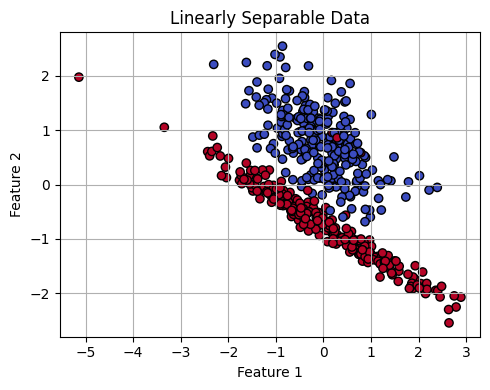

In [9]:
plot_data(X_linear, y_linear, "Linearly Separable Data")

In [10]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid)
    preds = preds.reshape(xx.shape)
    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, preds, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.show()

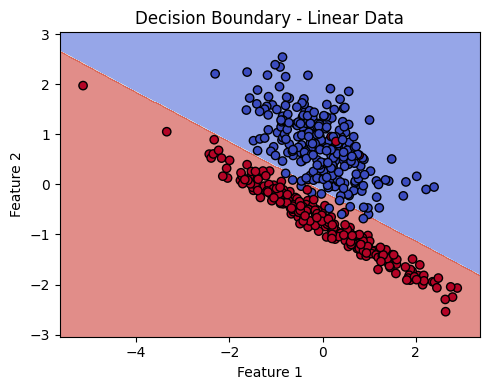

In [11]:
plot_decision_boundary(mlp_linear, X_linear, y_linear, "Decision Boundary - Linear Data")

#### <ins>**Non-Linearly Separable Data**</ins>

#### Import necessary libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Load the dataset

In [13]:
X_nonlinear, y_nonlinear = make_moons(n_samples=500, noise=0.2, random_state=42)

#### Preprocess the data

In [14]:
scaler = StandardScaler()
X_nonlinear = scaler.fit_transform(X_nonlinear)

#### Splitting the data

In [15]:
X_train_non, X_test_non, y_train_non, y_test_non = train_test_split(X_nonlinear, y_nonlinear, test_size=0.2, random_state=42)

#### Multi Layer Perceptron

In [16]:
class MultiLayerPerceptron:
    def __init__(self, input_dim, hidden_dim, output_dim=1, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.W1 = np.random.randn(input_dim, hidden_dim) * 0.1
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim) * 0.1
        self.b2 = np.zeros((1, output_dim))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, a):
        return a * (1 - a)

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y, output):
        m = X.shape[0]
        dZ2 = output - y.reshape(-1, 1)
        dW2 = (1 / m) * np.dot(self.A1.T, dZ2)
        db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.sigmoid_derivative(self.A1)
        dW1 = (1 / m) * np.dot(X.T, dZ1)
        db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def train(self, X, y):
        for _ in range(self.epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        probs = self.forward(X)
        return (probs >= 0.5).astype(int).flatten()

#### Training the model

In [17]:
mlp_nonlinear = MultiLayerPerceptron(input_dim=2, hidden_dim=10)
mlp_nonlinear.train(X_train_non, y_train_non)

#### Evaluating the model

In [18]:
y_pred_non = mlp_nonlinear.predict(X_test_non)
print("Accuracy (Non-Linear Data):", accuracy_score(y_test_non, y_pred_non))

Accuracy (Non-Linear Data): 0.86


#### Visualisation

In [19]:
def plot_data(X, y, title):
    plt.figure(figsize=(5, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

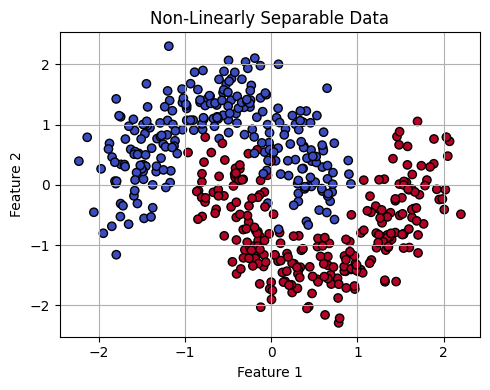

In [20]:
plot_data(X_nonlinear, y_nonlinear, "Non-Linearly Separable Data")

In [21]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid)
    preds = preds.reshape(xx.shape)
    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, preds, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.show()

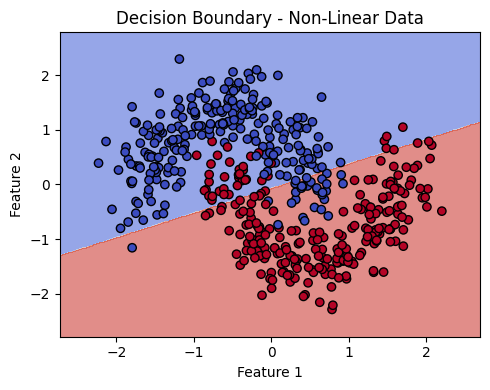

In [22]:
plot_decision_boundary(mlp_nonlinear, X_nonlinear, y_nonlinear, "Decision Boundary - Non-Linear Data")

### <ins>**Result**</ins>: 
The outputs were verified successfully

---